In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Data/Crop_Data.csv')

FileNotFoundError: ignored

In [ ]:
df.head()

,temperature,humidity,ph,water availability,season,label,Country,harvest season
0,20.879744,82.002744,6.502985,202.935536,rainy,rice,Nigeria,spring
1,21.770462,80.319644,7.038096,226.655537,rainy,rice,Nigeria,winter
2,23.004459,82.320763,7.840207,263.964248,rainy,rice,Nigeria,rainy
3,26.491096,80.158363,6.980401,242.864034,rainy,rice,Nigeria,rainy
4,20.130175,81.604873,7.628473,262.717340,rainy,rice,Nigeria,spring


In [ ]:
df.tail()

,temperature,humidity,ph,water availability,season,label,Country,harvest season
1395,23.874845,86.792613,6.718725,177.514731,rainy,jute,South Africa,winter
1396,23.928879,88.071123,6.880205,154.660874,rainy,jute,South Africa,winter
1397,24.814412,81.686889,6.861069,190.788639,rainy,jute,Nigeria,summer
1398,24.447439,82.286484,6.769346,190.968489,rainy,jute,Nigeria,summer
1399,26.574217,73.819949,7.261581,159.322307,rainy,jute,South Africa,summer


In [ ]:
df.size

11200

In [ ]:
df.shape

(1400, 8)

In [ ]:
df.columns

Index(['temperature', 'humidity', 'ph', 'water availability', 'season',
       'label', 'Country', 'harvest season'],
      dtype='object')

In [ ]:
df['harvest season'].unique()

array(['spring', 'winter', 'rainy', 'summer'], dtype=object)

In [ ]:
df.dtypes

temperature           float64
humidity              float64
ph                    float64
water availability    float64
season                 object
label                  object
Country                object
harvest season         object
dtype: object

In [ ]:
df['harvest season'].value_counts()

spring    367
summer    358
rainy     346
winter    329
Name: harvest season, dtype: int64

<AxesSubplot:>

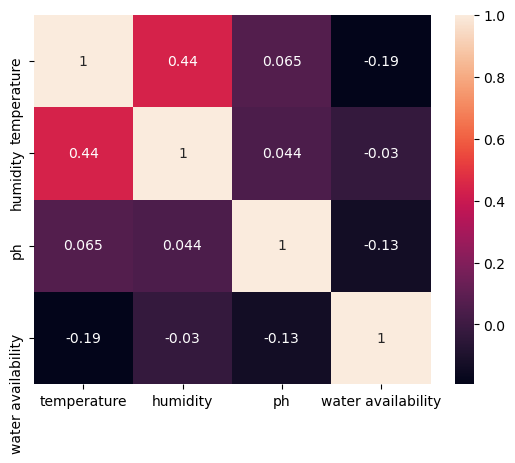

In [ ]:
sns.heatmap(df.corr(),annot=True)

### Seperating features and target label

In [ ]:
#features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
#target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
#labels = df['label']

from sklearn.preprocessing import LabelEncoder

# Separate features and target variable
features = df.drop('harvest season', axis=1)  # Features
target = df['harvest season']  # Target variable

# Convert categorical variables to numerical representations
label_encoder = LabelEncoder()
features['season'] = label_encoder.fit_transform(features['season'])
features['Country'] = label_encoder.fit_transform(features['Country'])
features['label'] = label_encoder.fit_transform(features['label'])

In [ ]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [ ]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
#Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Split the dataset
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  26.071428571428573
              precision    recall  f1-score   support

       rainy       0.00      0.00      0.00        74
      spring       0.25      0.31      0.28        67
      summer       0.29      0.67      0.40        70
      winter       0.16      0.07      0.10        69

   micro avg       0.26      0.26      0.26       280
   macro avg       0.17      0.26      0.19       280
weighted avg       0.17      0.26      0.19       280



In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [ ]:
score

array([0.27659574, 0.24911032, 0.15714286, 0.22222222, 0.23381295])

### Saving trained Decision Tree model

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.2392857142857143
              precision    recall  f1-score   support

       rainy       0.22      0.16      0.19        74
      spring       0.24      0.45      0.31        67
      summer       0.28      0.21      0.24        70
      winter       0.21      0.14      0.17        69

   micro avg       0.24      0.24      0.24       280
   macro avg       0.24      0.24      0.23       280
weighted avg       0.24      0.24      0.23       280



In [ ]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.24113475, 0.20996441, 0.19285714, 0.25089606, 0.18705036])

### Saving trained Guassian Naive Bayes model

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'models/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.24285714285714285
              precision    recall  f1-score   support

       rainy       0.09      0.01      0.02        74
      spring       0.23      0.51      0.32        67
      summer       0.27      0.31      0.29        70
      winter       0.28      0.16      0.20        69

   micro avg       0.24      0.24      0.24       280
   macro avg       0.22      0.25      0.21       280
weighted avg       0.21      0.24      0.20       280



In [ ]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.25177305, 0.24911032, 0.23214286, 0.19354839, 0.21582734])

### Saving trained Logistic Regression model

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.26785714285714285
              precision    recall  f1-score   support

       rainy       0.31      0.28      0.30        74
      spring       0.26      0.33      0.29        67
      summer       0.26      0.26      0.26        70
      winter       0.24      0.20      0.22        69

   micro avg       0.27      0.27      0.27       280
   macro avg       0.27      0.27      0.27       280
weighted avg       0.27      0.27      0.27       280



In [ ]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.26595745, 0.20284698, 0.19642857, 0.22222222, 0.20863309])

### Saving trained Random Forest model

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

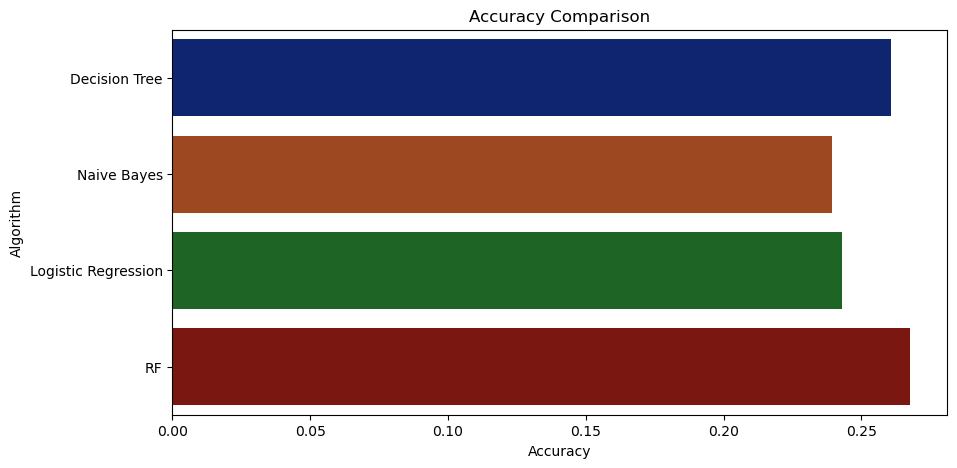

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [ ]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.26071428571428573
Naive Bayes --> 0.2392857142857143
Logistic Regression --> 0.24285714285714285
RF --> 0.26785714285714285


## Making a prediction

In [ ]:
data = np.array([[25.41447029, 87.20802629, 12.592490617, 250.1511304, 'rainy', 'mothbeans', 'Kenya']])
#prediction = RF.predict(data)
#print(prediction)

# Create a DataFrame from the input data
input_data = pd.DataFrame(data, columns=['temperature', 'humidity', 'ph', 'water availability', 'season', 'label', 'Country'])

# Perform one-hot encoding for categorical variables
input_data_encoded = pd.get_dummies(input_data, columns=['season', 'label', 'Country'])

# Extract the numerical features
numerical_features = input_data_encoded.values

# Make sure to replace 'RF' with the actual variable name of your trained model
prediction = RF.predict(numerical_features)
print(prediction)

['summer']
